In [79]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [80]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


## Importing Libraries

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import plotly.express as px
from datetime import datetime, date
from collections import Counter
from wordcloud import WordCloud
from pandasql import sqldf 
import pandasql as ps


## Load Excel File

In [82]:
#Reading the Dataset
xls = pd.ExcelFile("HospitalDatabase.xlsx")

#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')

#Reading the EDVisits sheet
df_EDV= pd.read_excel(xls, 'EDVisits')

#Reading the AmbulatoryVisits sheet
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')

#Reading the ReAdmissionRegistry 
df_RE = pd.read_excel(xls, 'ReAdmissionRegistry')

#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')

#Reading the Providers sheet
df_P = pd.read_excel(xls, 'Providers')

#Reading the EDUnique sheet
df_E = pd.read_excel(xls, 'EDUnique')

## Question 1. Calculate the time spent in ED Department for each visit.

In [83]:
df_EDV['time spent'] = (df_EDV['EDDischargeTime'] - df_EDV['VisitDate']) / np.timedelta64(1, 'h')
# Print the result
df_EDV[['PatientID', 'time spent']]

,PatientID,time spent
0,1,11.339701
1,12,23.238949
2,13,1.848931
3,14,1.336054
4,15,2.638901
...,...,...
1194,929,15.885959
1195,932,22.451119
1196,933,4.500985
1197,934,6.176404


## Question 2. Get the  number of patients based on service and primary diagnosis.

In [84]:
#Reading the ReAdmissionRegistry 
#checking the count of patients based on service and primary diagnosis
dfs = df_RE.groupby(['Service','PrimaryDiagnosis'])['AdmissionID'].count()
# to show
print(dfs)

Service           PrimaryDiagnosis  
Cardiology        AMI                   40
                  Afib                  10
                  Broken Leg             3
                  Flu                    2
                  Heart Failure         39
                  Kidney Failure         1
General Medicine  Broken Leg             3
                  Diabetes              38
                  Fever                 13
                  Flu                   54
                  Hypertension          35
                  Kidney Failure        12
                  Laceration            21
                  Pneumonia             67
                  Stroke                20
Hospitalist       AMI                    1
                  Broken Leg             3
                  Diabetes              26
                  Fever                  3
                  Flu                   19
                  Hypertension           6
                  Kidney Failure         6
                 

## Question 3. Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.

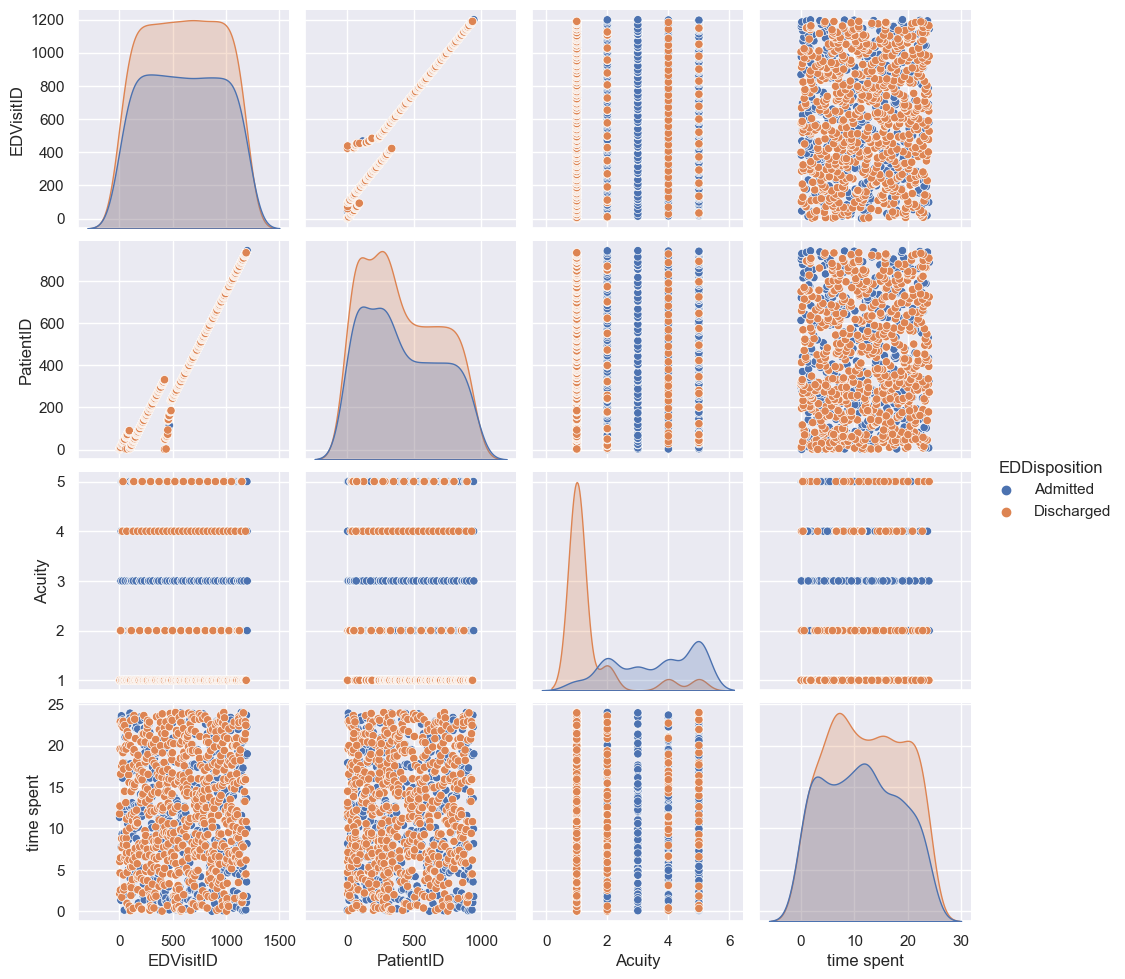

In [85]:
#Reading the EDVisits sheet
# creating a pairplot
sns.pairplot(df_EDV, hue ='EDDisposition')
# to show
plt.show()

## Question 4. Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.  (Attach screenshots for this question)

In [86]:
mysql = lambda q: sqldf(q, globals() )
df_Tnames  = ps.sqldf("select ProviderName from df_P where ProviderName like 'T%'")
df_Tnames

,ProviderName
0,Ted Texas
1,Ted Green
2,Ted Black
3,Tyler Conner
4,Tony Creed
5,Trent Tye


## Question 5. Create a bar chart between expectedLOS & Primary diagnosis.

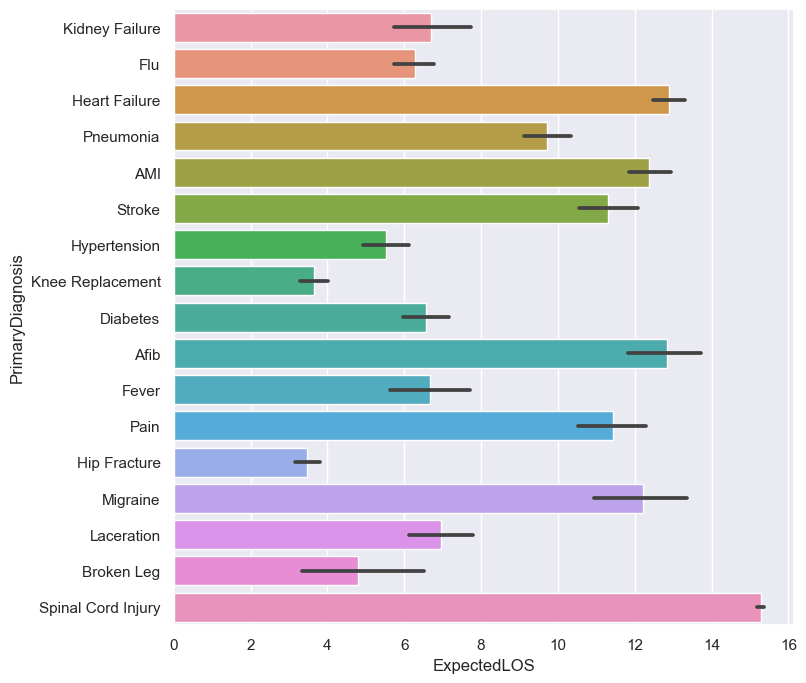

In [87]:
#Reading the ReAdmissionRegistry 
# creating bar chart
sns.barplot(x = 'ExpectedLOS',y = 'PrimaryDiagnosis',data = df_RE)
# to show
plt.show()

## Question 6. Find the last name of the patients, by getting the first name from the user.

In [88]:
#Reading the Patients sheet
# taking the name of the patients as input
firstName = input('What is your first name?\n')
# to find the last names from the given first name
df_PA[df_PA.FirstName == firstName]['LastName'].tolist()

What is your first name?
ted


[]

## Question 7. Find the list of patients whose ExpectedLOS is greater than the value given by the user.

In [89]:
#Reading the Discharges sheet
#Validating the correct input fron user
while True:
    val = input("Enter Expected LOS: ")
    try:
        val = float(val)
    except:
        print('Please use the valid numeric numbers.')
        continue
    if val < 0:
        print('Please enter a positive number.')
        continue
    break


temp_df = df_D.loc[(df_D['ExpectedLOS']> float(val))] 
# printing the output
print("%s%s" % ('List Of Patients whose ExpectedLOS is greater than ' +str(val)+' day(s) is  : ',  len(temp_df.index)))

Enter Expected LOS: 30
List Of Patients whose ExpectedLOS is greater than 30.0 day(s) is  : 0


## Question 8. Using Sunburst chart display the providers name by thier provider speciality, considering thier experience.

In [90]:
import pandas as pd
import datetime
import plotly.express as px

#Reading the Providers sheet
df_P = pd.read_excel(xls, 'Providers')

# Convert the ProviderDateOnStaff column to datetime format
df_P['ProviderDateOnStaff'] = pd.to_datetime(df_P['ProviderDateOnStaff'], format='%m/%d/%Y')

# Calculate the providers' experience in days
df_P['Experience'] = (datetime.datetime.now() - df_P['ProviderDateOnStaff']).dt.days

# Create a sunburst chart with providers' names by their provider specialty and experience
fig = px.sunburst(df_P, path=['ProviderSpecialty', 'ProviderName', 'Experience'], values='ProviderID')

# Show the chart
fig.show()

In [91]:
# we can see the new Experience column in the dataframe
df_P

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff,Experience
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000,11064
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695,10943
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687,10889
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299,10707
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838,10325
5,6,Harry Kane,Pediatrics,1995-07-21 03:49:03.310,10133
6,7,Barry Bar,Pediatrics,1995-11-21 19:30:38.759,10009
7,8,Ted Green,Pediatrics,1996-05-30 06:14:52.539,9819
8,9,Ted Black,Pediatrics,1997-02-20 08:01:10.211,9553
9,10,Fred Man,Surgery,1998-03-17 01:47:18.794,9163


## Question 9. Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.

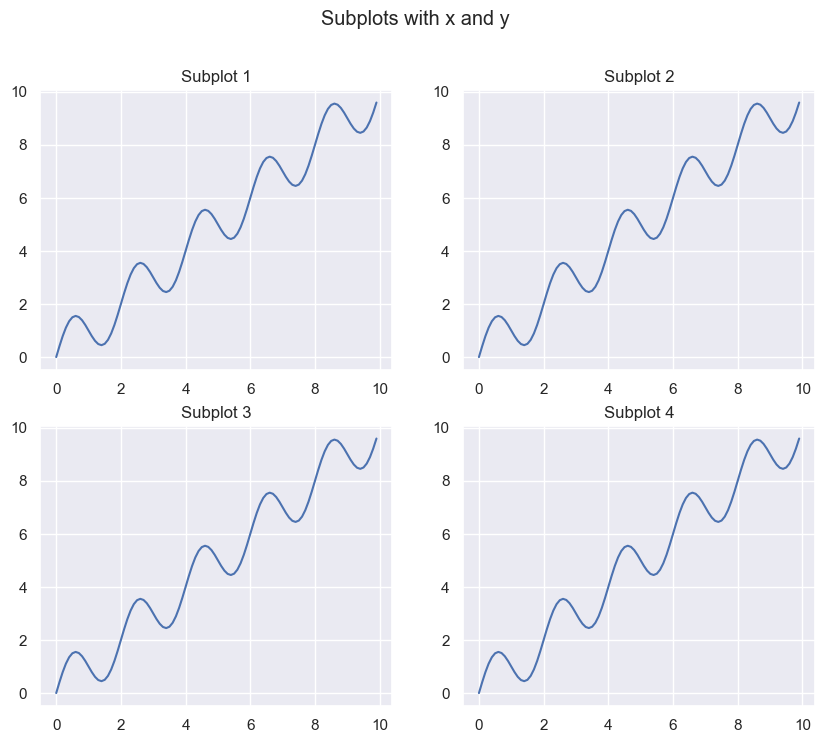

In [92]:
# Define x and y values
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x

# Create figure and subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot data in each subplot
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Subplot 1')
axs[0, 1].plot(x, y)
axs[0, 1].set_title('Subplot 2')
axs[1, 0].plot(x, y)
axs[1, 0].set_title('Subplot 3')
axs[1, 1].plot(x, y)
axs[1, 1].set_title('Subplot 4')

# Add overall title to the figure
fig.suptitle('Subplots with x and y')

# Display the plot
plt.show()



## Question 10. Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions).

In [93]:
#Reading the EDVisits sheet
df = pd.read_excel(xls, 'EDVisits')

df = df.groupby(["ReasonForVisit","EDDisposition"]).size().reset_index(name='Total_Num_Patients')
print(df)

stack_df=df.stack(level=0)
print('STACKED OUTPUT IS')
print(stack_df)

unstack_df = stack_df.unstack().unstack().unstack()
print('UNSTACKED OUTPUT IS')
print(unstack_df)

         ReasonForVisit EDDisposition  Total_Num_Patients
0              Accident      Admitted                  39
1              Bleeding      Admitted                  16
2              Bleeding    Discharged                  15
3          Car Accident      Admitted                  17
4            Chest Pain      Admitted                  94
5            Chest Pain    Discharged                  15
6                 Cough    Discharged                   1
7                 Fever      Admitted                  46
8                 Fever    Discharged                 188
9              Gun Shot      Admitted                  16
10         Intoxication    Discharged                  30
11           Laceration    Discharged                  30
12             Migraine      Admitted                  47
13             Migraine    Discharged                 109
14            Pneumonia      Admitted                 136
15            Pneumonia    Discharged                  65
16  Shortness 

## Question 11. Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.

In [94]:
#Reading the ReAdmissionRegistry 
# Create a new dataframe with the discharge time as values
discharge_data = pd.DataFrame(df_RE['DischargeDate'])

# Extract the date and time from the discharge time and create separate columns for them
discharge_data['Date'] = discharge_data['DischargeDate'].dt.date
discharge_data['Time'] = discharge_data['DischargeDate'].dt.time

# Print the result
print(discharge_data[['Date', 'Time']])


           Date             Time
0    2018-01-04  19:59:31.391000
1    2018-01-04  21:28:51.898000
2    2018-01-04  22:28:23.672000
3    2018-01-05  05:47:04.933000
4    2018-01-05  14:18:30.029000
..          ...              ...
715  2018-03-07  21:22:10.061000
716  2018-03-08  02:43:18.749000
717  2018-03-08  09:27:18.377000
718  2018-03-10  06:06:12.068000
719  2018-03-10  20:38:30.568000

[720 rows x 2 columns]


## Question 12. Create a visualization on the count of patients based on primary diagnosis.

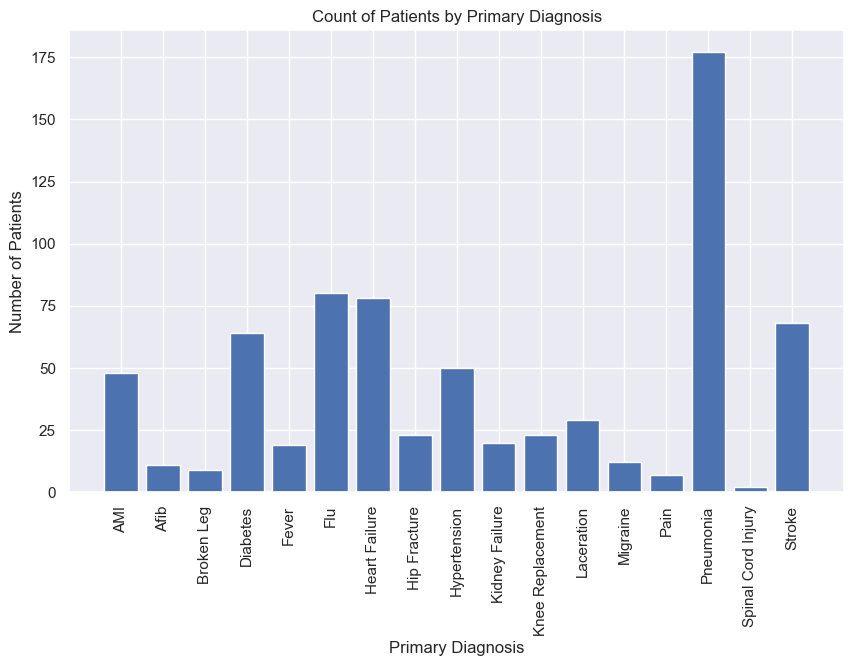

In [95]:
diagnosis_counts = df_RE.groupby('PrimaryDiagnosis')['PatientID'].count()

# Create a bar plot of the diagnosis counts
plt.figure(figsize=(10, 6))
plt.bar(diagnosis_counts.index, diagnosis_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Primary Diagnosis')
plt.ylabel('Number of Patients')
plt.title('Count of Patients by Primary Diagnosis')
plt.show()

## Question 13. Create a bar chart on service & expected length of stay.

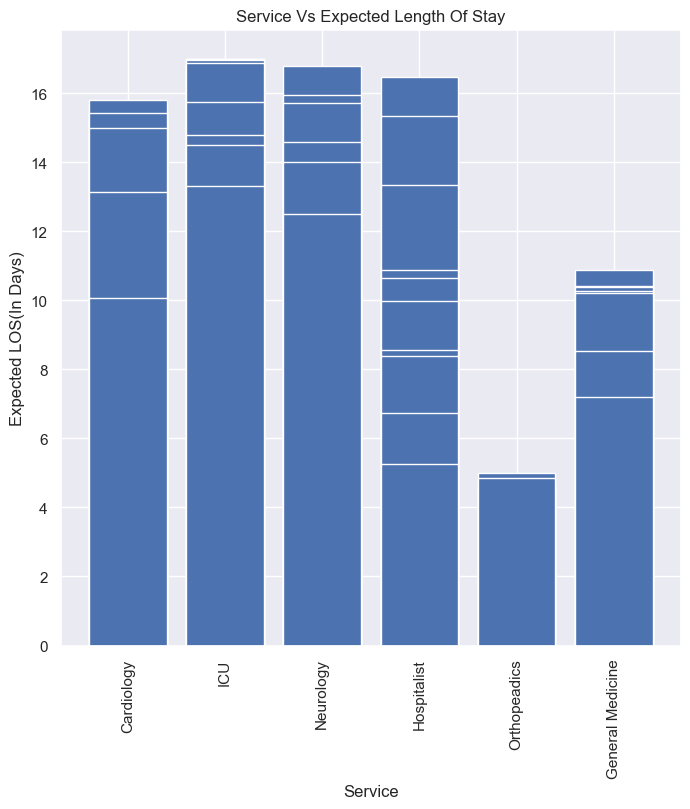

In [96]:
#Reading the Discharges sheet
plt.bar(df_D['Service'], df_D['ExpectedLOS'])
plt.title('Service Vs Expected Length Of Stay')
plt.xlabel('Service')
plt.xticks(rotation=90)
plt.ylabel('Expected LOS(In Days)')

plt.show()

## Question 14. Find the count of Spanish Speaking patients.

In [97]:
#Reading the Patients sheet
# Filter the data to include only Spanish speaking patients
spanish_speaking = df_PA.loc[df_PA['Language'] == 'Spanish']

# Get the count of Spanish speaking patients
count_spanish_speaking = spanish_speaking['PatientID'].nunique()

# Print the result
print('Number of Spanish speaking patients:', count_spanish_speaking)


Number of Spanish speaking patients: 110


## Question 15. Create a boxplot on ExpectedLOS by taking service into account.

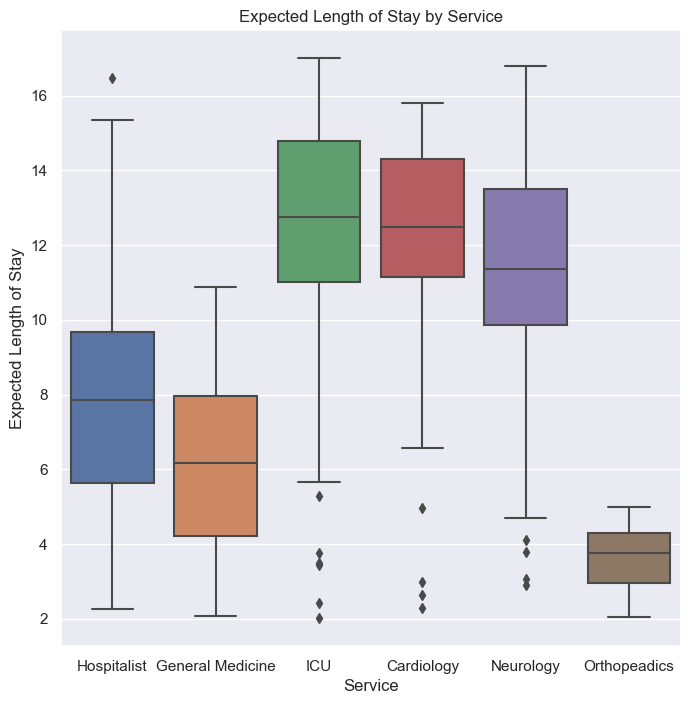

In [98]:
#Reading the ReAdmissionRegistry 
# Create a boxplot of ExpectedLOS by Service
sns.boxplot(x='Service', y='ExpectedLOS', data=df_RE)
sns.set(rc={'figure.figsize':(8,8)})
plt.title('Expected Length of Stay by Service')
plt.xlabel('Service')
plt.ylabel('Expected Length of Stay')
plt.show()

## Question 16. Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).

In [99]:
df_P['Number of Specialty']=1
df_P.groupby([ 'ProviderSpecialty'])['Number of Specialty'].count().reset_index()

,ProviderSpecialty,Number of Specialty
0,Cardiology,8
1,Pediatrics,9
2,PrimaryCare,16
3,Surgery,7


## Question 17. Connect to sql and write a query to get Ambulatory visit record's year. (Attach screenshots for this question)

In [100]:
ps.sqldf("select strftime('%Y', DateofVisit) As VisitRecordsYear from df_AV")

,VisitRecordsYear
0,2019
1,2019
2,2019
3,2019
4,2019
...,...
945,2019
946,2019
947,2019
948,2019


## Question 18. Display using a donut chart the patient count in the ReAdmissionRegistry.

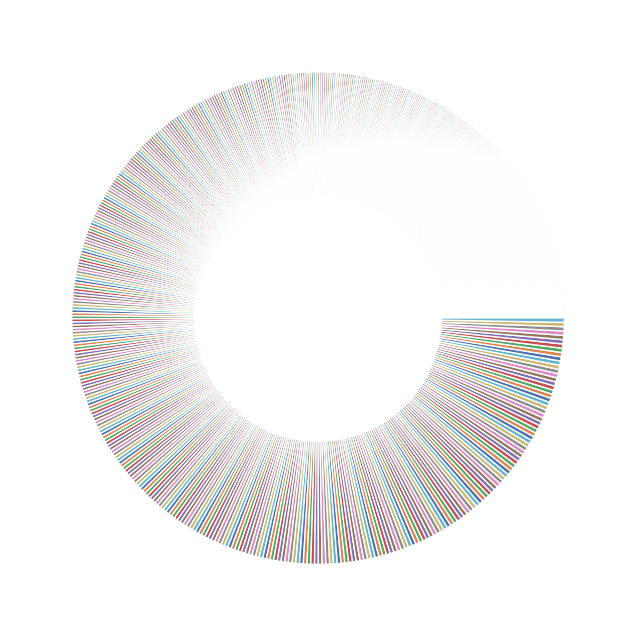

In [101]:
#Moving the values into Array
ty = np.array(df_RE['PatientID'])

#Creating Pie chart
plt.pie(ty)

#Creating the Donut chart
circle = plt.Circle(xy=(0,0), radius = 0.5, facecolor = 'white' )
plt.gca().add_artist(circle)
plt.show()

## Question 19. Show the records where the ExpectedLos is greater than the difference between the max and min ExpectedLos.

In [102]:
#Reading the ReAdmissionRegistry 
# Calculate the difference between the max and min ExpectedLos
diff_expected_los = df_RE['ExpectedLOS'].max() - df_RE['ExpectedLOS'].min()

# Filter the dataframe to show the records where ExpectedLOS is greater than the difference
filtered_df = df_RE[df_RE['ExpectedLOS'] > diff_expected_los]

# Print the filtered dataframe
print(filtered_df)


     AdmissionID  PatientID AdmissionDate           DischargeDate  \
6            549          8    2018-01-01 2018-01-07 15:39:25.987   
18           252         19    2018-01-01 2018-01-17 14:13:23.627   
31           550         27    2018-01-02 2018-01-13 07:34:46.603   
46           391         41    2018-01-03 2018-01-10 00:57:05.440   
64           609         59    2018-01-04 2018-01-09 01:18:34.182   
88           144         83    2018-01-05 2018-01-17 11:00:10.366   
95           145         90    2018-01-06 2018-01-15 03:16:35.614   
100          444         95    2018-01-06 2018-01-19 02:57:34.514   
113          445        108    2018-01-07 2018-01-22 06:49:20.132   
118          114        113    2018-01-08 2018-01-14 22:04:11.532   
140          398        134    2018-01-10 2018-01-15 16:43:47.026   
144           10        139    2018-01-10 2018-01-23 02:52:59.927   
182          368        178    2018-01-14 2018-01-18 13:44:53.072   
197           68        194    201

## Question 20. Using a bar chart, which Service had the lowest count of Expected Mortality?

Service with the lowest count of Expected Mortality: Orthopeadics


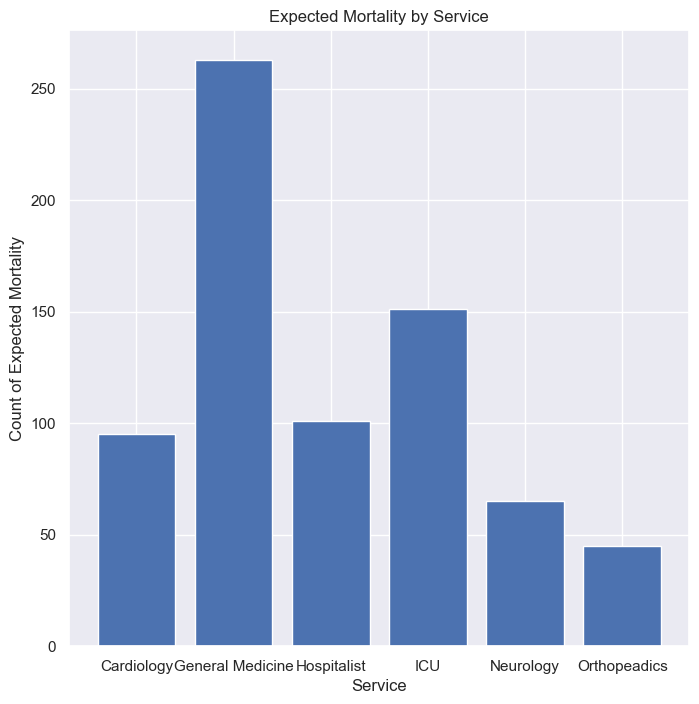

In [103]:
#Reading the Discharges sheet
# group by Service and calculate the count of Expected Mortality
df_mortality = df_D.groupby('Service')['ExpectedMortality'].count().reset_index(name='count')

# create a bar chart
fig, ax = plt.subplots()
ax.bar(df_mortality['Service'], df_mortality['count'])
ax.set_xlabel('Service')
ax.set_ylabel('Count of Expected Mortality')
ax.set_title('Expected Mortality by Service')

# find the Service with the lowest count
lowest_service = df_mortality.loc[df_mortality['count'].idxmin(), 'Service']
print("Service with the lowest count of Expected Mortality:", lowest_service)

plt.show()


## Question 21. Which reason of visit has maximum mortality rate.

In [104]:
#Merge EDVisits with the ReAdmissionRegistry
merge_df_mmr = pd.merge(df_E, df_RE, on="PatientID") 
merge_df_mmr

#pivot table in the merge table
pivot_max = merge_df_mmr.pivot_table(index=['ReasonForVisit'], values = ['ExpectedMortality'], aggfunc='mean')

#Get the highest top value 
pivot_max.sort_values(by=['ExpectedMortality'], ascending=False).head(1)

,ExpectedMortality
ReasonForVisit,
Gun Shot,0.376451


## Question 22. Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).

In [105]:
#Finding Avg LOS
df_D['Average_LOS'] = (df_D['DischargeDate'] - df_D['AdmissionDate']) / np.timedelta64(1, 'D')

#Pivot Table
pivot1 = df_D.pivot_table(index=['Service', 'DischargeDisposition'], values=['Average_LOS'], aggfunc='mean')
pivot1

Average_LOS
Service          DischargeDisposition             
Cardiology       Expired                  9.357828
                 Home                    10.633869
                 Transfer                11.759865
General Medicine Expired                  8.972359
                 Home                    10.298306
                 Transfer                11.075935
Hospitalist      Expired                 10.587996
                 Home                     9.522124
                 Transfer                 9.248801
ICU              Expired                  9.790686
                 Home                     9.575618
                 Transfer                 9.479894
Neurology        Expired                 10.650761
                 Home                     9.677446
                 Transfer                12.261288
Orthopeadics     Expired                 12.327644
                 Home                     9.325017
                 Transfer                16.559908

## Question 23. Add column 'Age' in Patient table.

In [106]:
from datetime import datetime
#Calculating Age in Years
Age = datetime.today().year - df_PA['DateOfBirth'].dt.year

#Creating an Age Column
df_PA['Age'] = Age
df_PA

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,63
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,38
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,47
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,55
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,61
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,37
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,53
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,40
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,60


## Question 24. Using arrays and loops, find the count of patients based on gender.

In [107]:
# Create an empty dictionary to store the gender counts
gender_counts = {}

for index, row in enumerate(df_PA.itertuples(), 1):
    gender = getattr(row, 'Gender')  # Get the gender value from the row
    # Check if gender is already in the dictionary, and update the count
    if gender in gender_counts:
        gender_counts[gender] += 1
    else:
        gender_counts[gender] = 1
        
# Print the gender counts
print(gender_counts)

{'Male': 537, 'Female': 408}


## Question 25. Create bins to segregate Patients with 'Mild Hypertension','Moderate ','High Hypertension','Severe Hypertension'. Create a new column to show your analysis.

In [108]:
#Creating bins
SBP_based = [120,130,140,180,190]

#Giving labels for the created bins
label_SBP = ["Mild Hypertension", "Moderate Hypertension", "High Hypertension", "Severe Hypertension"]

#Creating new column in the Dataframe
df_AV['Analysis'] = pd.cut(df_AV['BloodPressureSystolic'], bins = SBP_based, labels =  label_SBP)

#Creating a new Dataframe with a selected columns
df_AV_new_Hyp = df_AV[['VisitID','PatientMRN','BloodPressureSystolic','Analysis']].copy()
df_AV_new_Hyp

,VisitID,PatientMRN,BloodPressureSystolic,Analysis
0,202,840,188.0,Severe Hypertension
1,436,820,179.0,High Hypertension
2,794,879,133.0,Moderate Hypertension
3,799,884,132.0,Moderate Hypertension
4,515,32,131.0,Moderate Hypertension
...,...,...,...,...
945,788,873,187.0,Severe Hypertension
946,703,855,182.0,Severe Hypertension
947,481,865,150.0,High Hypertension
948,398,635,177.0,High Hypertension


## Question 26. Plot a graph to show the distribution of expected mortality.

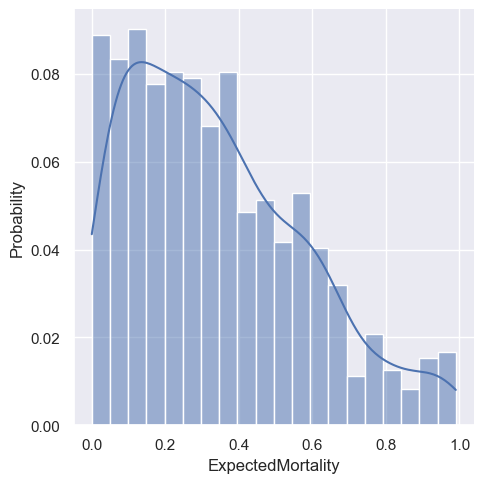

In [109]:
#Creating a distribution plot with bar and kde(Kernel Density Estimation) 
sns.displot(df_D['ExpectedMortality'], stat = 'probability', kde = True, bins = 20)
plt.show()

## Question 27. Which departmentID has maximum number of visits scheduled.

In [110]:
#Capturing the row to get the column 'VisitDepartmentID'
lst = df_AV['VisitDepartmentID']
cnt = Counter(lst)

maximums = [x for x in cnt if cnt[x] == cnt.most_common(1)[0][1]]
print('DepartmentID with maximum number of visits:',maximums)

DepartmentID with maximum number of visits: [11]


## Question 28. Find the visit type with maximum 'No Show'.

In [111]:
#Top value of the sorted list is displayed
V_Type = df_AV[df_AV['VisitStatus'] == 'No Show'].groupby(['VisitType'])['PatientMRN'].count().sort_values(ascending=False) 
print(V_Type.head(1))

VisitType
Telemedicine    74
Name: PatientMRN, dtype: int64


## Question 29. Which demographic patients are prone to get stroke?

In [112]:
#Extracting only 2 fields based on 'PrimaryDiagnosis'
df_RE_new = df_RE.loc[df_RE['PrimaryDiagnosis'] == 'Stroke', 'PatientID']

#Merging based on PatientID
merge_df_pd = pd.merge(df_PA, df_RE_new, on="PatientID") 

#Grouping based on Race
p_stroke = merge_df_pd.groupby(['Race'])['PatientID'].count().sort_values(ascending=False)
print(p_stroke.head(1))

Race
Black/African-American    40
Name: PatientID, dtype: int64


## Question 30. Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.

In [113]:
P_details = df_P.loc[(df_P['ProviderID'] > 10) & (df_P['ProviderID'] < 21) & (df_P['ProviderSpecialty'] == 'Surgery')]
print(P_details)

    ProviderID     ProviderName ProviderSpecialty     ProviderDateOnStaff  \
10          11     Kim Kimberly           Surgery 1998-05-10 14:47:29.468   
11          12         Sarah Ab           Surgery 1998-08-18 05:22:40.762   
12          13  Abigail Marriot           Surgery 1998-11-08 12:25:45.705   
13          14          Dave Yu           Surgery 1999-06-26 16:18:57.436   
14          15  Christian Saint           Surgery 2000-08-27 00:12:40.326   
15          16     Perry Pardon           Surgery 2001-02-13 11:49:17.862   

    Experience  Number of Specialty  
10        9109                    1  
11        9009                    1  
12        8927                    1  
13        8696                    1  
14        8269                    1  
15        8099                    1  


## Question 31. If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name.

In [114]:
#Add a new column call Fullname and concatenate the name with the respective prefix
df_PA.loc[df_PA['Gender'] == 'Male','Fullname'] = 'Mr'+' '+ df_PA['FirstName'] +' '+ df_PA['LastName']
df_PA.loc[df_PA['Gender'] == 'Female','Fullname'] = 'Ms'+' '+ df_PA['FirstName'] +' '+ df_PA['LastName']
df_PA

#df_PA[df_PA['Gender'] == 'Male'] #To validate for Male
#df_PA[df_PA['Gender'] == 'Female'] #To validate for Female

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,Fullname
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,63,Mr Lanni Sue
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,38,Mr Far Myers
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,47,Mr Devlin Michael
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,55,Mr Carmine Texas
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,61,Mr Tann Bama
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,37,Mr Wat Fideler
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,53,Mr Wandie Baythrop
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,40,Mr Diahann Smeeton
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,60,Mr Panchito Sharple


## Question 32. Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.

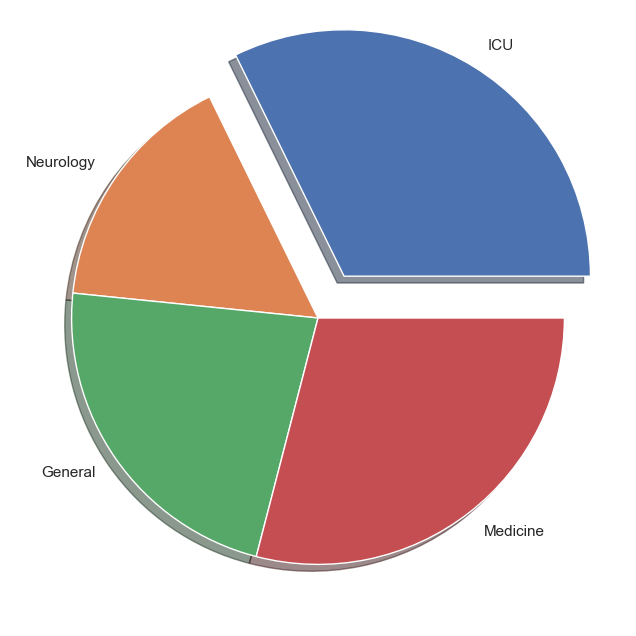

In [115]:
#Creating an array
service_pie = np.array([10,5,7,9])

#Declaring the Explode Position and the labels
myexplode=[0.2,0,0,0]
mylabels=["ICU", "Neurology", "General", "Medicine"]

#Pie Chart with Services and explode the highest LOS
plt.pie(service_pie, labels=mylabels, explode=myexplode, shadow= True)
plt.show()

## Question 33. Plot a graph to show the distribution of expected length of stay.

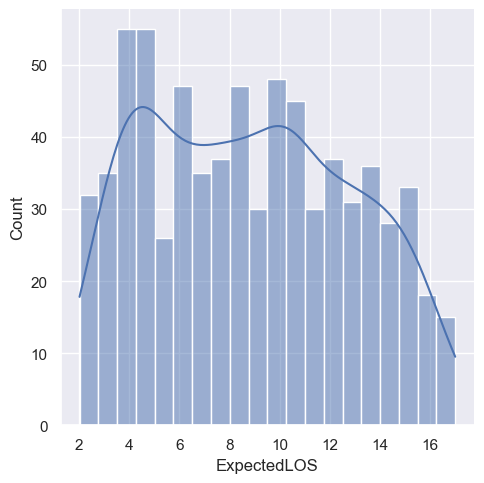

In [116]:
#Distribution Chart
sns.displot(df_D["ExpectedLOS"], kde="True", bins=20)
plt.show()

## Question 34. Create a WordCloud Chart with Reason For Visit.

In [117]:
#Choosing the Column count
d_cnt = df_E.groupby(['ReasonForVisit'])['PatientID'].count()
wordcloud = WordCloud(colormap=None, width=600, height=400, background_color= 'cyan').generate_from_frequencies(d_cnt)
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')

(-0.5, 599.5, 399.5, -0.5)

## Question 35. np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30. When the value is less than 6, print as -1,else print 99.

In [118]:
Arr = np.arange(1,31)
New2Darr =Arr.reshape(6,5)
set1 =(New2Darr[0:1 , 3:5])
set2 =(New2Darr[4:6 , 3:5])
set1 = np.where(set1 <6,-1, 99)
set2 = np.where(set2 <6,-1, 99)
print (set1)
print (set2)

[[-1 -1]]
[[99 99]
 [99 99]]


## Question 36. Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)¶

In [119]:
Patient_count = df_AV.loc[(df_AV['BloodPressureSystolic'] > 180 ) & (df_AV['BloodPressureDiastolic'] > 120)]
print('Count of Patients:',Patient_count['PatientMRN'].count())

Count of Patients: 101


## Question 37. Display the data where actual LOS is greater than expected LOS.

In [120]:
#Calculate the Actual Length Of Stay
ActualLOS = df_D['DischargeDate'] - df_D['AdmissionDate']

#Converting the datetime stamp to float in days
df_D['ActualLOS']= ActualLOS/np.timedelta64(1, 'D')

Data_diff = df_D[df_D['ActualLOS'] > df_D['ExpectedLOS']]
Data_diff

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,Average_LOS,ActualLOS
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827,12.124360,12.124360
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468,8.564307,8.564307
5,395,109,2018-01-07,2018-01-22 17:57:37.103,Expired,Cardiology,Flu,2.981758,0.192976,15.748346,15.748346
6,396,115,2018-01-08,2018-01-17 02:19:05.623,Expired,Cardiology,Flu,4.959098,0.254923,9.096593,9.096593
7,259,116,2018-01-08,2018-01-20 03:40:53.605,Expired,Cardiology,Broken Leg,2.279624,0.491274,12.153398,12.153398
...,...,...,...,...,...,...,...,...,...,...,...
712,703,703,2018-02-21,2018-02-27 08:53:38.211,Transfer,General Medicine,Pneumonia,3.539165,0.275691,6.370581,6.370581
713,709,708,2018-02-21,2018-03-01 05:59:22.116,Transfer,General Medicine,Diabetes,4.518876,0.455570,8.249562,8.249562
714,697,713,2018-02-21,2018-03-04 00:23:19.967,Transfer,General Medicine,Pneumonia,8.542970,0.201036,11.016203,11.016203
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695,13.146589,13.146589


## Question 38. Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.

In [121]:
#Using Pandas Loc to Index with Slices

loc_indices = df_PA.loc[101:200, ['FirstName','LastName']]
loc_indices

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


## Question 39. Delete the column 'DischargeDispostion' iteratively.

In [122]:
#DischargeDisposition
df_RE_withNoDD = df_RE.drop(columns=["DischargeDisposition"], axis=1)
df_RE_withNoDD

,AdmissionID,PatientID,AdmissionDate,DischargeDate,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


## Question 40. Create a jointplot on expected mortality & expected length of stay.

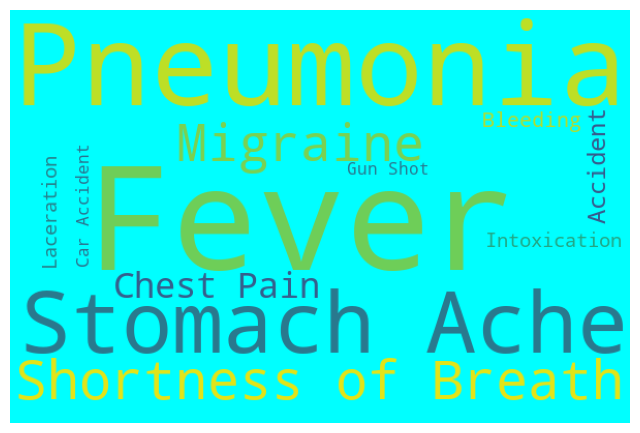

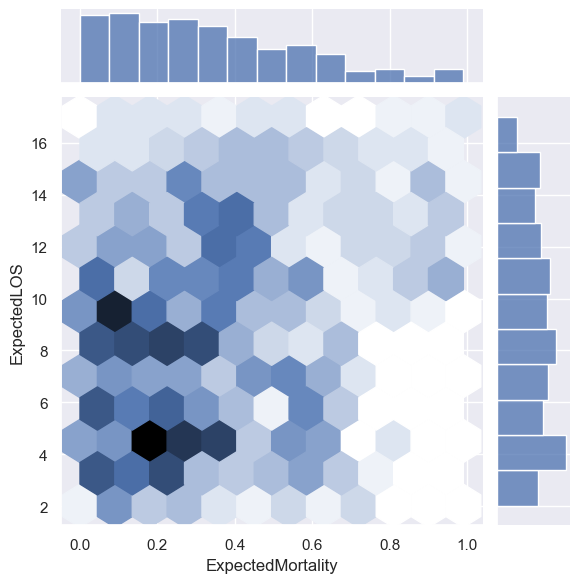

In [123]:
#ExpectedLOS, ExpectedMortality from Discharges Sheet
sns.jointplot(data = df_D, x = 'ExpectedMortality',y = 'ExpectedLOS',kind = 'hex')

plt.show()

## Question 41. Find the age prone to get stroke.

In [124]:
from datetime import datetime
## Reading ReAdmissionRegistry sheet
df_RE=pd.read_excel(xls, 'ReAdmissionRegistry')

## Reading Patients Sheet
df_PA=pd.read_excel(xls, 'Patients')

##  Created dataframe by selecting two columns from ReAdmissionRegistry sheet
df_new_re = df_RE[['PatientID','PrimaryDiagnosis']]

## Selecting patients with primaryDiagnosis=stroke
df_new_re= df_new_re[df_new_re['PrimaryDiagnosis']=='Stroke']

## Created dataframe by selecting two columns from patients sheet
df_new_pa= df_PA[['PatientID', 'DateOfBirth']]

## finding age using dateofbirth column
## coverting data of birth column to datetime object
df_new_pa['DateOfBirth'] = pd.to_datetime(df_PA['DateOfBirth'])

## current date
current_date = datetime.now()

## calculating age
df_new_pa['Age'] = (current_date - df_new_pa['DateOfBirth']).astype('<m8[Y]')

## creating new dataframe with patientID and age
df_new_pa= df_new_pa[['PatientID', 'Age']]

## perform merge operation
merge_df= pd.merge(df_new_re,df_new_pa, on='PatientID')

 ## group by 
Result= merge_df.pivot_table(index=['Age'],values=['PatientID'],aggfunc='count')
# Alias the column
Result = Result.rename(columns={'PatientID': 'Count of Patients'})

print(Result)

      Count of Patients
Age                    
36.0                  1
37.0                  2
38.0                  3
39.0                  3
40.0                  4
41.0                  2
42.0                  4
44.0                  3
45.0                  1
46.0                  1
47.0                  4
48.0                  2
49.0                  4
50.0                  1
51.0                  1
52.0                  4
53.0                  1
54.0                  3
55.0                  3
57.0                  3
58.0                  7
59.0                  1
60.0                  2
61.0                  4
62.0                  3
63.0                  1


/var/folders/tx/bdr_g3nd6tg4j4rvcg1ljl580000gn/T/ipykernel_39241/3089029144.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/tx/bdr_g3nd6tg4j4rvcg1ljl580000gn/T/ipykernel_39241/3089029144.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Question 42. Calculate mortality by diagnosis.

In [125]:
#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')

temp_df = df_D.loc[(df_D['DischargeDisposition'] == 'Expired')]
results = temp_df['PrimaryDiagnosis'].value_counts()
print(results)

Hypertension          16
Pneumonia             16
Heart Failure         16
Flu                   11
Diabetes               9
Stroke                 7
AMI                    6
Afib                   4
Fever                  4
Broken Leg             3
Hip Fracture           3
Kidney Failure         2
Spinal Cord Injury     2
Knee Replacement       2
Laceration             2
Pain                   1
Name: PrimaryDiagnosis, dtype: int64


## Question 43. Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.

In [126]:
df_PA[df_PA.FirstName.str.contains('lau', case=False) | df_PA.LastName.str.contains('lau', case=False)]

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
282,283,Lauren,Gaskal,1962-05-08 01:54:00.111,Female,Black/African-American,English
322,323,Lauren,Foort,1960-06-23 20:07:53.045,Female,White,English
369,370,Zulauf,Ellingham,1982-12-17 16:27:56.391,Female,White,English
382,383,Zulauf,LLC,1969-03-16 07:48:49.338,Female,White,English
454,455,Zulauf,Alvar,1961-10-02 08:24:17.334,Female,White,English
463,464,Zulauf,Manske,1965-06-22 02:49:28.667,Female,White,English
818,819,Zulauf,Bitcheno,1967-04-02 07:17:53.635,Female,White,English
830,831,Zulauf,O'Shavlan,1970-05-17 08:09:28.988,Female,White,English
850,851,Lemmy,Klausen,1973-06-18 06:19:43.475,Female,White,English
906,907,Jerrilyn,Klausen,1979-09-04 13:05:57.870,Male,Black/African-American,English


## Question 44. Display data by splitting age in 4 quartiles and labeling the quartiles.

In [127]:
## coverting data of birth column to datetime object
df_new_pa['DateOfBirth'] = pd.to_datetime(df_PA['DateOfBirth'])

## current date
current_date = datetime.now()

## calculating age
df_new_pa['Age'] = (current_date - df_new_pa['DateOfBirth']).astype('<m8[Y]')
#print(df_new_pa['Age'])
df_new_pa['Age'].sort_values()
print("Q1 quantile of AGE : ", np.quantile(df_new_pa['Age'], .25, interpolation='midpoint'))
print("Q2 quantile of AGE : ", np.quantile(df_new_pa['Age'], .50, interpolation='midpoint'))
print("Q3 quantile of AGE : ", np.quantile(df_new_pa['Age'], .75, interpolation='midpoint'))
print("Q4 quantile of AGE : ", np.quantile(df_new_pa['Age'], 1.00, interpolation='midpoint'))

Q1 quantile of AGE :  43.0
Q2 quantile of AGE :  49.0
Q3 quantile of AGE :  56.0
Q4 quantile of AGE :  63.0


/var/folders/tx/bdr_g3nd6tg4j4rvcg1ljl580000gn/T/ipykernel_39241/3919197005.py:11: DeprecationWarning:

the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)

/var/folders/tx/bdr_g3nd6tg4j4rvcg1ljl580000gn/T/ipykernel_39241/3919197005.py:12: DeprecationWarning:

the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)

/var/folders/tx/bdr_g3nd6tg4j4rvcg1ljl580000gn/T/ipykernel_39241/3919197005.py:13: DeprecationWarning:

the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated Nu

## Question 45. Usage of Enumeration in Python with any example.

In [128]:
# Example list
fruits = ["apple", "banana", "cherry", "date"]

# Iterate over the list using enumeration
for index, value in enumerate(fruits):
    print(f"Index: {index}, Value: {value}")

Index: 0, Value: apple
Index: 1, Value: banana
Index: 2, Value: cherry
Index: 3, Value: date


## Question 46. Count of canceled status.

In [129]:
#selecting all patients with Canceled status
df_new_AV = df_AV.loc[(df_AV['VisitStatus']=='Canceled') ]

print("%s%s" % ('Count Of Patients with ''Canceled'' status  : ',  len(df_new_AV.index)))

Count Of Patients with Canceled status  : 60


## Question 47. Display the patient details with maximum pulse pressure.

In [130]:
#Reading the AmbulatoryVisits sheet
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')
sorted_df = df_AV.sort_values(by=['Pulse'], ascending=False)
# Rename the 'PatientMRN' column to 'PatientID'
df_AV_new1 = df_AV.rename(columns={'PatientMRN':'PatientID'})
# Perform merge operation with df_PA on 'PatientID' column
merge_df1 = pd.merge(df_AV_new1, df_PA, on='PatientID')
merge_df2=merge_df1[['PatientID','Pulse','FirstName','LastName']]
#print(merge_df2)
#Get the row with the highest pulse value
#max_pulse_row = sorted_df.head(1)
# Print the row with the highest pulse value
#print(max_pulse_row
sorted=merge_df2.sort_values(by=['Pulse'],ascending=False)
sorted.head(1)

,PatientID,Pulse,FirstName,LastName
249,812,99.986463,Daniel,Group


## Question 48. Create a heat map to show the correlation between the column values of Edvisits.

In [131]:
#checking correlation
corr=df_EDV.corr()
print(corr)

            EDVisitID  PatientID    Acuity  time spent
EDVisitID    1.000000   0.975477  0.005813    0.015873
PatientID    0.975477   1.000000  0.003545    0.020262
Acuity       0.005813   0.003545  1.000000   -0.033968
time spent   0.015873   0.020262 -0.033968    1.000000


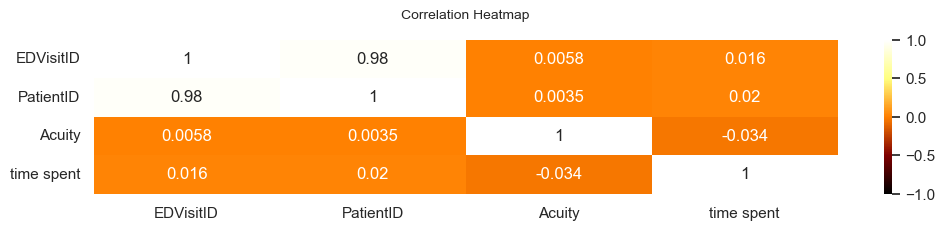

In [132]:
# Create a correlation heatmap
plt.figure(figsize=(12,2))
heatmap = sns.heatmap(df_EDV.corr(), vmin=-1, vmax=1, annot=True, cmap="afmhot")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=15)

plt.show()

## Question 49. Plot a graph by counting the no. of patients in each department.

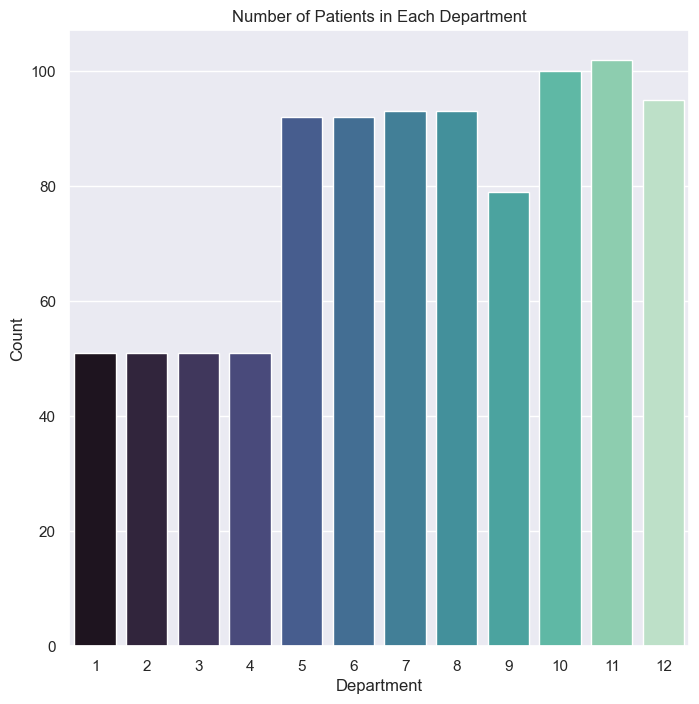

In [133]:
# Create a countplot
sns.set(style="darkgrid")
sns.countplot(data =df_AV, x='VisitDepartmentID', palette="mako")
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Number of Patients in Each Department")
plt.show()

## Question 50. Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [134]:
#selecting patient details with conditions
df_new_EDV=df_EDV.loc[((df_EDV['ReasonForVisit'] == 'Migraine') |  (df_EDV['ReasonForVisit'] == 'Pneumonia')) &  (df_EDV['Acuity']  >=2)]
#print(df_new_EDV)
## creating new dataframe with patientID and age
df_new_EDV= df_new_EDV[['PatientID','ReasonForVisit', 'Acuity' ]]
print(df_new_EDV)

      PatientID ReasonForVisit  Acuity
1            12       Migraine       2
3            14       Migraine       3
11           29      Pneumonia       2
12           30      Pneumonia       3
13           31      Pneumonia       4
...         ...            ...     ...
1107        773       Migraine       2
1150        850       Migraine       2
1152        852       Migraine       2
1160        868       Migraine       2
1162        870       Migraine       2

[215 rows x 3 columns]


## Question 51. Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.

In [135]:
x = input("Enter the reason for visit: ")
print(x)

temp_df = df_EDV.loc[(df_EDV['ReasonForVisit'] == x) ]

print("%s%s" % ('Patients admitted with ' + x + ' are : ',  len(temp_df.index)))

Enter the reason for visit: feb
feb
Patients admitted with feb are : 0


## Question 52. Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.

In [136]:
df_AV.loc[df_AV['BloodPressureSystolic'].idxmax()]

VisitID                                          933
PatientMRN                                       884
ProviderID                                        27
DateofVisit                      2019-02-14 00:00:00
DateScheduled             2019-01-22 19:26:49.163000
VisitDepartmentID                                 12
VisitType                               Telemedicine
BloodPressureSystolic                          190.0
BloodPressureDiastolic                    143.989174
Pulse                                      74.976879
VisitStatus                                Completed
Name: 236, dtype: object

## Question 53. Plot a graph by multiplotting on the same canvas  (Take any set of x & y values).

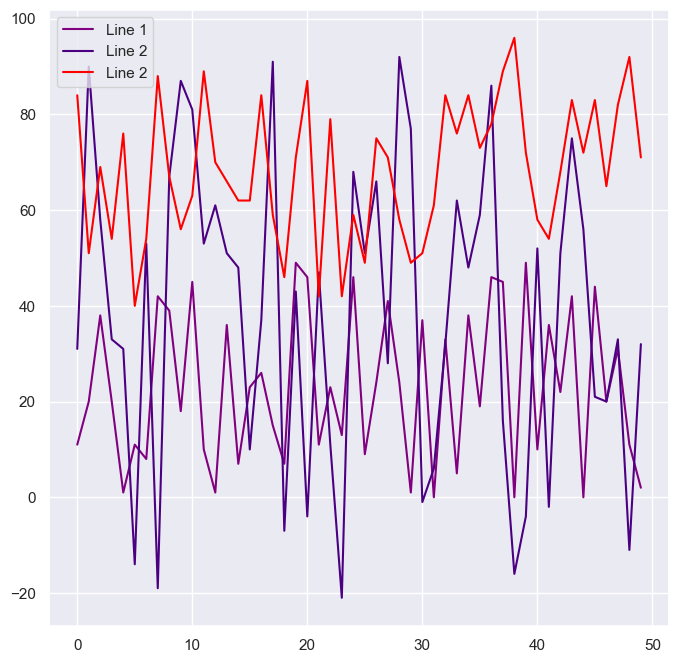

In [137]:
line_1 = np.random.randint(low = 0, high = 50, size = 50)
line_2 = np.random.randint(low = -25, high = 100, size = 50)
line_3 =np.random.randint(low = 40, high = 100, size = 50)

fig, ax = plt.subplots()

ax.plot(line_1, color = 'Purple', label = 'Line 1')
ax.plot(line_2, color = 'Indigo', label = 'Line 2')
ax.plot(line_3, color = 'red', label = 'Line 2')

ax.legend(loc = 'upper left')
plt.show()

## Question 54. Retrieve the row with minimum DBP using sorting technique.

In [138]:
sorted_df = df_AV.sort_values(by=['BloodPressureDiastolic'], ascending=True)

sorted_df.head(1)

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.181,7,Follow Up,120.0,51.695653,53.310495,Completed


## Question 55. Replace all the null values in ReadmissionFlag with 0.

In [139]:
df_RE['ReadmissionFlag'] = df_RE['ReadmissionFlag'].fillna(0)
df_RE['ReadmissionFlag']

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
715    0.0
716    0.0
717    0.0
718    0.0
719    0.0
Name: ReadmissionFlag, Length: 720, dtype: float64

## Question 56. Get the list of patient ID's which are not there in ReadmissionRegistry.

In [165]:
#selecting patientID column from ReadmissionRegistry sheet
df_new_RE = list(df_RE["PatientID"])
#checking list of patientID's which are not there in ReadmissionRegistry
df_PA[~df_PA['PatientID'].isin(df_new_RE)]

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
134,135,Cally,Aylward,1962-01-13 00:11:17.581,Male,Black/African-American,English
144,145,Sheena,LLC,1966-10-17 13:24:21.621,Male,Black/African-American,English
188,189,Rempel,Group,1974-07-17 04:55:39.964,Male,Black/African-American,English
199,200,Fonz,Group,1964-01-15 01:57:57.966,Male,Black/African-American,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


## Question 57. Find reasonForVisit with highest count of acuity 5 patients.

In [166]:
Rfv = df_E[df_E['Acuity'] == 5].groupby(['ReasonForVisit'])['PatientID'].count() # Total 186 from ED Visits Sheet
print(Rfv)

ReasonForVisit
Accident               37
Car Accident           15
Chest Pain             53
Fever                  15
Gun Shot               16
Pneumonia              13
Shortness of Breath    37
Name: PatientID, dtype: int64


## Question 58. Display full name of patients who are born in 1986.

In [167]:
Fname= df_PA.loc[(df_PA['DateOfBirth'].dt.year) == 1986]
print(Fname.FirstName+' '+Fname.LastName)

23         Gabriel  Joseph
24         Lincoln  Brenda
29             Ala Halpert
72            Lolita Darci
164         Fadel Bernardt
238         Bentley Kippax
367            Vale Olanda
373          Britt Dureden
386       Cristabel Chatel
415       Constantia Group
452       Morgan Scrowston
561             Dom Baglow
568        Ignazio Melling
595         Homenick Rings
639           Hashim Slark
643       Ellie Ramsbotham
674        Llewellyn Group
714             Niles Shaw
733             Yvette Inc
777          Siouxie Group
852            Carly Group
868        Worth Pickering
877           Arni Baldack
909       Kuvalis Coupland
922    Rebbecca Rollingson
940            Wat Fideler
dtype: object


## Question 59. Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.

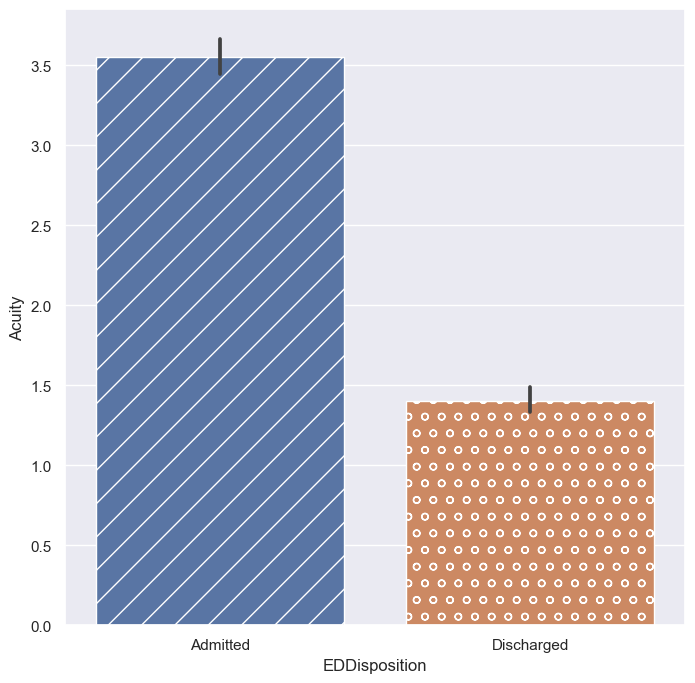

In [141]:
df_EDV.drop_duplicates()
a = sns.barplot(data=df_EDV, x= 'EDDisposition', y= 'Acuity' )

a.patches[0].set_hatch('/')  # Hatching pattern for the first bar
a.patches[1].set_hatch('o') # Hatching pattern for the second bar
plt.show()

## Question 60. Create a heat map on Readmission Registry table to find correlation between columns values.

In [142]:
#checking correlation
corr=df_RE.corr()
print(corr)

                           AdmissionID  PatientID  ExpectedLOS  \
AdmissionID                   1.000000   0.302079    -0.070080   
PatientID                     0.302079   1.000000    -0.015485   
ExpectedLOS                  -0.070080  -0.015485     1.000000   
ExpectedMortality             0.034083   0.008014     0.220725   
ReadmissionFlag              -0.023375  -0.118339     0.224874   
DaysToReadmission             0.049632   0.001710     0.010294   
EDVisitAfterDischargeFlag          NaN        NaN          NaN   

                           ExpectedMortality  ReadmissionFlag  \
AdmissionID                         0.034083        -0.023375   
PatientID                           0.008014        -0.118339   
ExpectedLOS                         0.220725         0.224874   
ExpectedMortality                   1.000000         0.133818   
ReadmissionFlag                     0.133818         1.000000   
DaysToReadmission                  -0.052563              NaN   
EDVisitAfterDisc

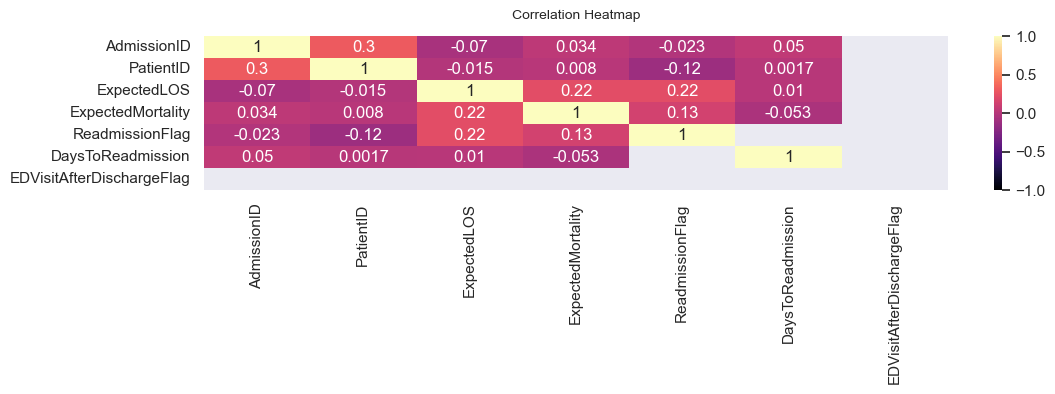

In [143]:
# Create a correlation heatmap
plt.figure(figsize=(12,2))
heatmap = sns.heatmap(df_RE.corr(), vmin=-1, vmax=1, annot=True, cmap="magma")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12)

plt.show()

## Question 61. np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17

In [144]:
A = np.arange(1,31)
B = A.reshape(6, 5)
print(B)
B[2:4,0:2]

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]


array([[11, 12],
       [16, 17]])

## Question 62. Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

In [145]:

#Read EDVisits sheet with selected columns
df_EDV= pd.read_excel(xls, 'EDVisits',usecols=['Acuity', 'EDDisposition','PatientID'])

#set the index to the 2 columns
df_EDV = df_EDV.set_index(['Acuity','EDDisposition'])

#To show the indices as acuity and EDDisposition
print("Original Dataframe with index changed:\n",df_EDV)

#count of number of patients as value
df_EDV['count'] = df_EDV.groupby(['PatientID'])['PatientID'].transform('count')

#Display modified DataFrame
print("Modified DataFrame:\n",df_EDV)

Original Dataframe with index changed:
                       PatientID
Acuity EDDisposition           
1      Admitted               1
2      Admitted              12
3      Admitted              13
       Admitted              14
       Admitted              15
...                         ...
4      Discharged           929
1      Discharged           932
       Discharged           933
       Discharged           934
       Discharged           935

[1199 rows x 1 columns]
Modified DataFrame:
                       PatientID  count
Acuity EDDisposition                  
1      Admitted               1      3
2      Admitted              12      2
3      Admitted              13      2
       Admitted              14      2
       Admitted              15      2
...                         ...    ...
4      Discharged           929      1
1      Discharged           932      1
       Discharged           933      1
       Discharged           934      1
       Discharged           93

## Question 63. List male patients over the age of 60 who have undergone surgery from January-March 2019.

In [146]:
Pva = pd.merge(df_AV, df_P, on = "ProviderID")
avpa = pd.merge(df_PA, Pva, left_on="PatientID", right_on="PatientMRN")
avpa[(avpa.Gender == 'Male')
    & (avpa.DateOfBirth.dt.year < (datetime.today().year-60))
    & (avpa.ProviderSpecialty == 'Surgery')
    & (avpa.DateScheduled.dt.year == 2019)
    & (avpa.DateScheduled.dt.month >= 1)
    & (avpa.DateScheduled.dt.month <= 3)]

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,VisitID,PatientMRN,ProviderID,...,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus,ProviderName,ProviderSpecialty,ProviderDateOnStaff,Experience,Number of Specialty
11,15,Gabriel,Saint,1961-11-18 06:47:20.682,Male,White,Spanish,12,15,12,...,New,133.0,84.997205,62.342676,Completed,Sarah Ab,Surgery,1998-08-18 05:22:40.762,9009,1
297,533,Chaddy,Alekseev,1962-09-25 00:19:23.874,Male,Black/African-American,English,596,533,13,...,Physical,143.0,95.303929,63.937952,Completed,Abigail Marriot,Surgery,1998-11-08 12:25:45.705,8927,1
299,536,Derrek,Alekseev,1962-09-21 03:50:55.567,Male,Black/African-American,English,597,536,14,...,Physical,137.0,84.743808,82.525978,Completed,Dave Yu,Surgery,1999-06-26 16:18:57.436,8696,1
343,581,Constanta,Edgin,1960-06-06 08:19:25.534,Male,Black/African-American,English,380,581,11,...,Telemedicine,179.0,113.061708,84.869647,Completed,Kim Kimberly,Surgery,1998-05-10 14:47:29.468,9109,1
439,802,Berta,Loxly,1961-05-19 21:00:01.885,Male,White,English,164,802,12,...,Follow Up,NaN,NaN,NaN,Completed,Sarah Ab,Surgery,1998-08-18 05:22:40.762,9009,1
744,876,Gerty,Gheorghie,1962-03-08 09:17:10.706,Male,White,English,724,876,14,...,Telemedicine,142.0,86.553402,60.834514,No Show,Dave Yu,Surgery,1999-06-26 16:18:57.436,8696,1


## Question 64. Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

In [147]:
#Reading the Providers sheet
df_P= pd.read_excel(xls, 'Providers')

   
df_new = df_P['ProviderName'].str.split(expand=True)
# adding headers to column in data frame 
headers =  ["First Name", "Last Name"]
df_new.columns = headers
df_new 

,First Name,Last Name
0,Sally,Sue
1,Mike,Myers
2,Jordan,Michael
3,Ted,Texas
4,Ala,Bama
5,Harry,Kane
6,Barry,Bar
7,Ted,Green
8,Ted,Black
9,Fred,Man


## Question 65. Plot a graph showing the count of patients for the reason visited the hospital.

In [148]:
#Reading the EDVisits sheet
df_EDV= pd.read_excel(xls, 'EDVisits')
df_EDV['NumberOfPatients'] = 1
df_EDV.groupby(['ReasonForVisit'])['NumberOfPatients'].count().reset_index()
#plot the bar chart
A = sns.barplot(data=df_EDV,x='PatientID', y= 'ReasonForVisit', errwidth=0)
#assign labels
A.bar_label(A.containers[0])

[Text(0, 0, '411.118'),
 Text(0, 0, '406.981'),
 Text(0, 0, '400.018'),
 Text(0, 0, '392.871'),
 Text(0, 0, '389.706'),
 Text(0, 0, '409.045'),
 Text(0, 0, '398.103'),
 Text(0, 0, '404.832'),
 Text(0, 0, '397.312'),
 Text(0, 0, '447.538'),
 Text(0, 0, '387.5'),
 Text(0, 0, '425'),
 Text(0, 0, '90')]

## Question 66. Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.

In [149]:
df_EDU = pd.read_excel(xls, 'EDUnique', usecols=['PatientID','ReasonForVisit'])
#Reading PatientIDs only with ReasonForVisit=Migraine
df2=df_EDU.loc[df_EDU['ReasonForVisit'] == "Migraine", 'PatientID']
print(df2)
#Reading the Patients sheet with selective columns
df_PA = pd.read_excel(xls, 'Patients',usecols=['PatientID','FirstName','LastName','DateOfBirth'])
#merging the 2 dataframes when df1.PatientID=df2.Patient_ID
df_temp = pd.merge(df2, df_PA, on="PatientID")
print(df_temp)

1       12
3       14
22       3
44      22
46      24
      ... 
908    870
921    897
928    908
930    910
935    924
Name: PatientID, Length: 116, dtype: int64
     PatientID FirstName  LastName             DateOfBirth
0           12    Zonnya        Ab 1963-05-23 10:04:33.074
1           14       Gan        Yu 1970-06-02 06:22:54.675
2            3   Devlin    Michael 1976-04-15 02:52:09.762
3           22    Joesph      Long 1979-12-04 16:45:56.080
4           24  Gabriel     Joseph 1986-05-31 09:36:05.716
..         ...       ...       ...                     ...
111        870     Hauck   Rubbens 1963-11-16 03:31:38.929
112        897   Barrows  Coupland 1979-10-31 18:28:35.483
113        908      Knox     Group 1975-08-25 22:27:50.177
114        910   Kuvalis  Coupland 1986-05-23 19:23:27.752
115        924    Daniel  Shakesby 1980-11-28 17:57:03.702

[116 rows x 4 columns]


## Question 67. Make a pivot table by the no. of patients from the admission date till discharge date

In [150]:
df_RE=pd.read_excel(xls,'ReAdmissionRegistry')
df_RE['_DischargeDate'] = df_RE['DischargeDate'].dt.date
pd.pivot_table(df_RE, index=['AdmissionDate', '_DischargeDate'], values='PatientID', aggfunc='count')

PatientID
AdmissionDate _DischargeDate           
2018-01-01    2018-01-04              3
              2018-01-05              2
              2018-01-06              1
              2018-01-07              3
              2018-01-08              1
...                                 ...
2018-02-22    2018-03-05              1
              2018-03-06              1
              2018-03-07              4
              2018-03-08              2
              2018-03-10              2

[459 rows x 1 columns]

## Question 68. Calculate average LOS.

In [151]:
df_RA = pd.read_excel(xls, 'ReAdmissionRegistry')
#mean() calculates the average
A=df_RA["ExpectedLOS"].mean()
print("Average Length of Stay=")
print(A)

Average Length of Stay=
8.824589159156156


## Question 69. Number of patients on 'Transfer' based on primary diagnosis.

In [152]:
temp_df1 = df_RA.loc[(df_RA['DischargeDisposition'] == 'Transfer') & (df_RA['PrimaryDiagnosis'] == 'Stroke')]
print("%s%s" % ('Number Of Patients for Stroke : ',  len(temp_df1.index)))

#creating a temporary dataframe with constraints of 'Transfer' and 'Heart Failure' as primary diagnosis
temp_df2 = df_RA.loc[(df_RA['DischargeDisposition'] == 'Transfer') & (df_RA['PrimaryDiagnosis']=='Heart Failure')]
print("%s%s" % ('Number Of Patients for Heart Failure : ',  len(temp_df2.index)))

#creating a temporary dataframe with constraints of 'Transfer' and 'Knee Replacement' as primary diagnosis
temp_df3 = df_RA.loc[(df_RA['DischargeDisposition'] == 'Transfer') & (df_RA['PrimaryDiagnosis'] == 'Knee Replacement')] 
print("%s%s" % ('Number Of Patients for Knee Replacement : ',  len(temp_df3.index)))

#creating a temporary dataframe with constraints of 'Transfer' and 'Laceration' as primary diagnosis
temp_df4 = df_RA.loc[(df_RA['DischargeDisposition'] == 'Transfer') & (df_RA['PrimaryDiagnosis'] == 'Laceration')] 
print("%s%s" % ('Number Of Patients for Knee Replacement : ',  len(temp_df4.index)))

#creating a temporary dataframe with constraints of 'Transfer' and 'Pain' as primary diagnosis
temp_df5 = df_RA.loc[(df_RA['DischargeDisposition'] == 'Transfer') & (df_RA['PrimaryDiagnosis'] == 'Pain')] 
print("%s%s" % ('Number Of Patients for Pneumonia : ',  len(temp_df5.index)))

#creating a temporary dataframe with constraints of 'Transfer' and 'Pneumonia' as primary diagnosis
temp_df6 = df_RA.loc[(df_RA['DischargeDisposition'] == 'Transfer') & (df_RA['PrimaryDiagnosis'] == 'Pneumonia')] 
print("%s%s" % ('Number Of Patients for Pneumonia : ',  len(temp_df6.index)))

Number Of Patients for Stroke : 9
Number Of Patients for Heart Failure : 9
Number Of Patients for Knee Replacement : 1
Number Of Patients for Knee Replacement : 1
Number Of Patients for Pneumonia : 1
Number Of Patients for Pneumonia : 8


## Question 70. Violin plot for Level of Acuity by Visit Reason 

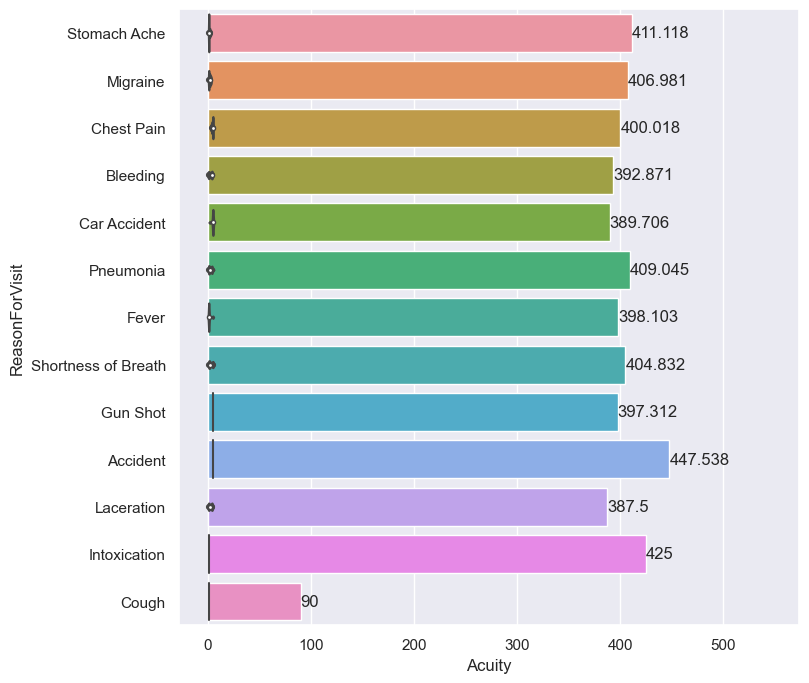

In [153]:
xls=pd.ExcelFile("HospitalDatabase.xlsx")
df_EDV= pd.read_excel(xls, 'EDVisits')
sns.violinplot(data=df_EDV,x='Acuity', y= 'ReasonForVisit')
plt.show()

## Question 71. Find the count of White Spanish Male.

In [155]:
len (df_PA[(df_PA['Race']=='White') & (df_PA['Language']=='Spanish') & (df_PA['Gender']=='Male')])

KeyError: 'Race'

## Question 72. Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?

In [156]:
df_D.groupby('PrimaryDiagnosis')['ExpectedLOS'].agg(np.ptp).idxmax()

'Pneumonia'

## Question 73. Which patient id has most entries in readmission registry.

In [157]:
#Reading the data from ReAdmissionRegistry sheet with only PatientID column
df_RA = pd.read_excel(xls, 'ReAdmissionRegistry',usecols=['PatientID'])

#sorting the data frame in descending order according to the element frequency.
df_RA = df_RA.groupby(['PatientID'])['PatientID'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
print("The patientID with most entries in readmission registry is ")
print(df_RA.head(1))

The patientID with most entries in readmission registry is 
    PatientID  Count
21         23      3


## Question 74. Create a figure object called fig using plt.figure() ** ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. ** ** Plot (x,y) on that axes and set the labels. Note : You can plot on any x,y set of values.

In [158]:
fig=plt.figure()
new_axis=fig.add_axes([0,0,1,1])
x=[1,2,3,4]
y=[2,4,6,8]
new_axis.set_xlabel("X lable")
new_axis.set_ylabel("y label")

Text(0, 0.5, 'y label')

## Question 75. Using numpy functions, multiply the following arrays                     a=np.arange(6).reshape(2,3)                                                                            b=np.arange(6).reshape(3,2)

In [159]:
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
outarr=np.dot(a,b)
print("result",outarr)

result [[10 13]
 [28 40]]


## Question 76. Mortality O:E

In [160]:
temp_df = df_D.loc[(df_D['DischargeDisposition'] == 'Expired')]
observed_Mortality = temp_df['DischargeDisposition'].value_counts()
expected_mortality = temp_df['ExpectedMortality'].sum()
Mortality = (observed_Mortality/expected_mortality)
print (Mortality)

Expired    2.98449
Name: DischargeDisposition, dtype: float64


## Question 77. Plot a graph to count the patients based on discharge disposition. 

In [161]:
xls=pd.ExcelFile("HospitalDatabase.xlsx")
df_D = pd.read_excel(xls, 'Discharges')
#plot the chart
A=sns.countplot(data = df_D,x = 'DischargeDisposition')
#assign labels
A.bar_label(A.containers[0])

[Text(0, 0, '104'), Text(0, 0, '577'), Text(0, 0, '39')]

## Question 78. Display total count of patients service wise based on gender.

In [162]:
df_D = pd.read_excel(xls, 'Discharges')

#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')

df_new_D = df_D[['PatientID', 'Service']]
#df_new_D

df_new_P = df_PA[['PatientID', 'Gender']]
#df_new_P

result =  pd.merge(df_new_D, df_new_P)


#display(result)
headers =  ["PatientID", "Service","Gender"]
display.columns = headers
#display


pivot = result.pivot_table(index=['Service','Gender'], values=['PatientID'], aggfunc='count')
print(pivot)

                         PatientID
Service          Gender           
Cardiology       Female         41
                 Male           54
General Medicine Female        114
                 Male          149
Hospitalist      Female         35
                 Male           66
ICU              Female         65
                 Male           86
Neurology        Female         34
                 Male           31
Orthopeadics     Female         22
                 Male           23


## Question 79. Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

In [163]:
#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')

df_D['diff_days'] = (df_D['DischargeDate'] - df_D['AdmissionDate']) / np.timedelta64(1, 'D')

pivot = df_D.pivot_table(index=['Service', 'PrimaryDiagnosis'], values=['diff_days'], aggfunc='mean')
print(pivot)

                                     diff_days
Service          PrimaryDiagnosis             
Cardiology       AMI                 10.743253
                 Afib                11.696580
                 Broken Leg          10.947355
                 Flu                 12.422469
                 Heart Failure        9.939645
                 Kidney Failure       4.677856
General Medicine Broken Leg          13.251505
                 Diabetes            10.836104
                 Fever                8.469869
                 Flu                 10.418172
                 Hypertension         9.487165
                 Kidney Failure      11.190868
                 Laceration           9.951947
                 Pneumonia            9.884497
                 Stroke              11.760999
Hospitalist      AMI                 10.021201
                 Broken Leg           8.276967
                 Diabetes             9.323806
                 Fever               10.910405
             

## Question 80. Display the data for all 'White Female' patients above the age of 50. 

In [164]:
df_PA[(df_PA.Race == 'White') 
      & (df_PA.Gender == 'Female') 
      & (df_PA.DateOfBirth.dt.year < (datetime.today().year-50))]

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
25,26,Sally,Bing,1972-08-03 00:05:39.560,Female,White,Spanish
28,29,Ted,Scott,1967-12-09 05:01:37.892,Female,White,Spanish
30,31,Harry,Ding,1960-10-08 01:42:51.212,Female,White,Spanish
33,34,Ted,Hue,1960-11-28 18:05:11.459,Female,White,Spanish
34,35,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish
...,...,...,...,...,...,...,...
865,866,Jermayne,Lowndes,1970-12-09 04:49:48.933,Female,White,English
866,867,Gail,Inc,1967-03-10 08:18:47.908,Female,White,English
867,868,Des,Heindrick,1969-08-15 11:05:30.165,Female,White,English
869,870,Hauck,Rubbens,1963-11-16 03:31:38.929,Female,White,English
